#Import the neccessary supporting files

In [ ]:
!wget https://til-ai.sbs/horse.png
!wget https://til-ai.sbs/tiger.png

#Start of the class

In [ ]:
!pip install torch torchvision
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15393, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 15393 (delta 9), reused 16 (delta 6), pack-reused 15369
Receiving objects: 100% (15393/15393), 14.37 MiB | 26.86 MiB/s, done.
Resolving deltas: 100% (10519/10519), done.


In [ ]:
import os
os.chdir('yolov5')

In [ ]:
import torch
import cv2
from IPython.display import clear_output
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load the pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-10 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
from PIL import Image
from IPython.display import display

def detect_objects(image_path):
    # Read image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform object detection
    results = model(img)

    # Render the image with bounding boxes
    results_img = results.render()
    results_img = cv2.cvtColor(np.array(results_img), cv2.COLOR_BGR2RGB)

    # Display the original image and the image with bounding boxes side by side
    original_img = Image.fromarray(img)
    result_img = Image.fromarray(results_img)
    
    display(original_img)
    display(result_img)

    # Print the detected objects with their classes, confidence scores, and bounding box coordinates
    for result in results.xyxy[0].tolist():
        class_id = int(result[5])
        confidence = result[4]
        class_name = model.names[class_id]
        x1, y1, x2, y2 = result[:4]
        print(f"Class: {class_name}, Confidence: {confidence:.2f}, Bounding Box: ({x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f})")


Saving horse.png to horse.png


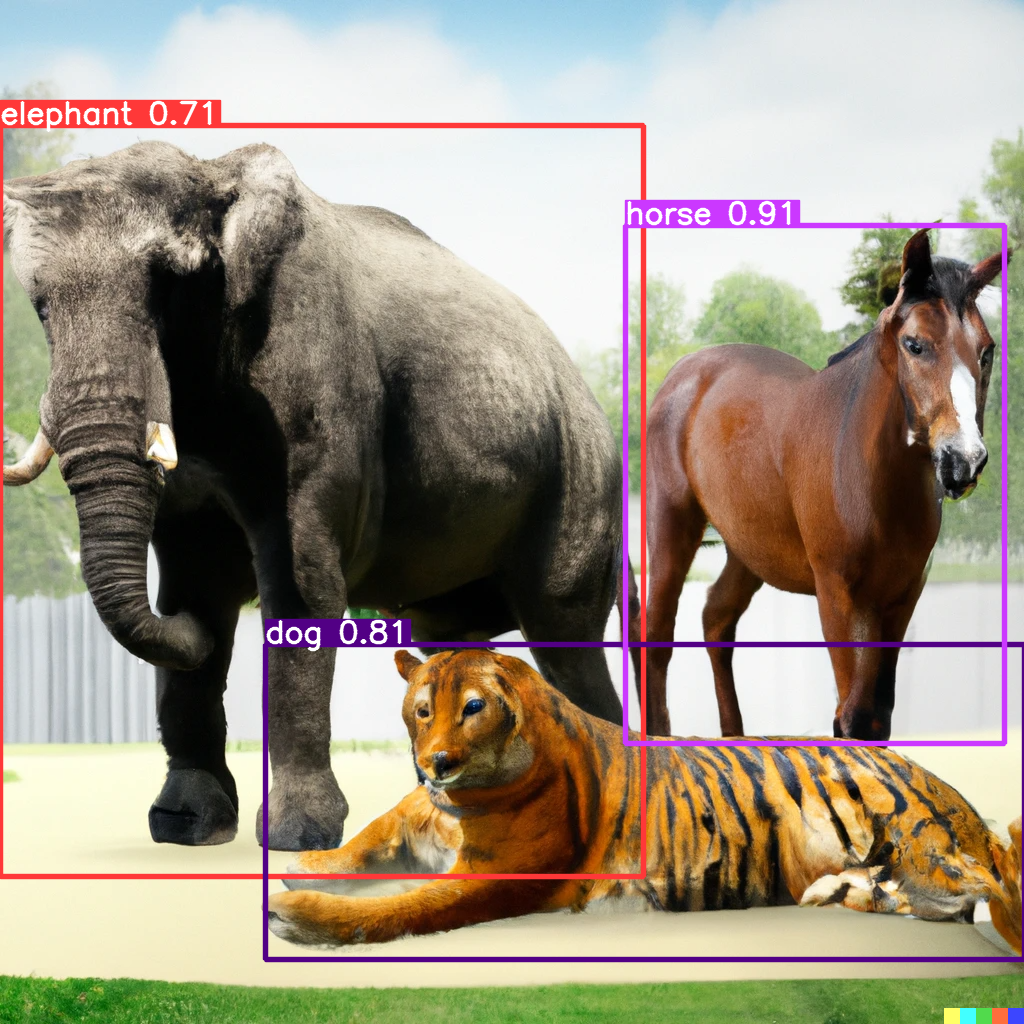

Class: horse, Confidence: 0.91, Bounding Box: (625, 225, 1004, 743)
Class: dog, Confidence: 0.81, Bounding Box: (266, 644, 1024, 960)
Class: elephant, Confidence: 0.71, Bounding Box: (0, 126, 643, 877)


In [ ]:
from google.colab import files

uploaded = files.upload()
for name, data in uploaded.items():
    image_path = name
    break  # Only use the first uploaded file


detect_objects(image_path)

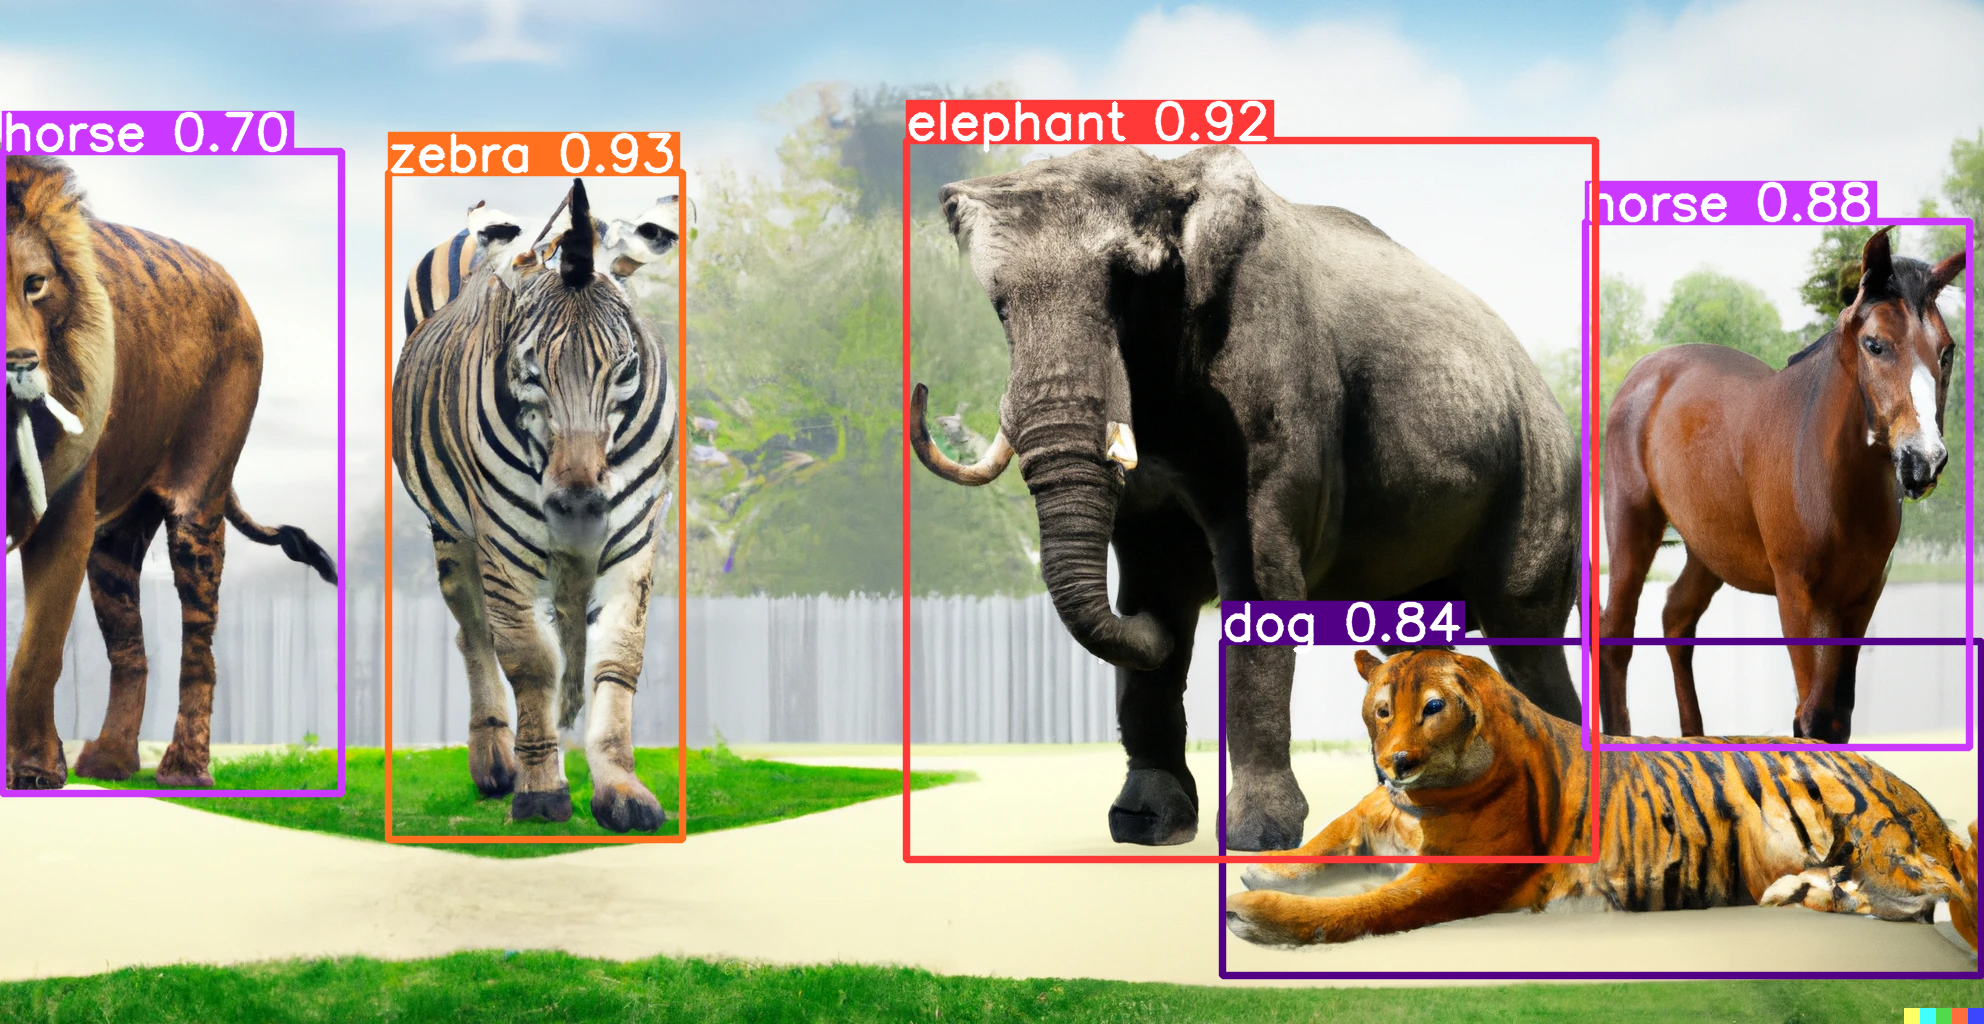

Class: zebra, Confidence: 0.93, Bounding Box: (388, 173, 682, 840)
Class: elephant, Confidence: 0.92, Bounding Box: (906, 140, 1595, 859)
Class: horse, Confidence: 0.88, Bounding Box: (1586, 221, 1970, 747)
Class: dog, Confidence: 0.84, Bounding Box: (1223, 641, 1981, 976)
Class: horse, Confidence: 0.70, Bounding Box: (3, 152, 341, 794)


In [ ]:
image_path = '/content/tiger.png'
detect_objects(image_path)